<a href="https://colab.research.google.com/github/ZehanQin/ECON5200-Applied-Data-Analytics-in-Econ/blob/main/Lab%203/Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
!pip install wbgapi

In [28]:
import wbgapi as wb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

country_codes = ['KGZ','LMC',"WLD"]

indicators ={
    'NY.GDP.PCAP.KD': 'GDP_Per_Capita_Const',
    'SL.TLF.CACT.ZS': 'Labor_Part_Rate',
    'SL.UEM.TOTL.ZS': 'Unemployment_Rate',
    'SL.TLF.TOTL.IN': 'Labor_Force_Total',
    'NY.GDP.MKTP.KD': 'GDP_Const',
    'FP.CPI.TOTL.ZG': 'Inflation_CPI',
    'NY.GDS.TOTL.ZS':'Gross_Dom_Savings',
    'NE.GDI.TOTL.ZS': 'Gross_Cap_Formation',
    'NE.EXP.GNFS.ZS': 'Exports_GDP',
    'NE.IMP.GNFS.ZS': 'Imports_GDP',
    'GC.TAX.TOTL.GD.ZS': 'Tax_Rev_GDP',
    'NE.CON.GOVT.ZS': 'Gov_Exp_GDP',
}


In [29]:
print("Fetching data...")
df_raw = wb.data.DataFrame(indicators, economy=country_codes, time=range(2000, 2025))
df = df_raw.T
df.index = df.index.str.replace('YR','').astype(int)
df.index.name = 'Year'
df=df.sort_index()
df.rename(columns=indicators, level=1, inplace=True)
df_kgz = df.xs ('KGZ',axis=1, level=0).copy()

Fetching data...


In [30]:
df_kgz['Natural_Rate_Unemp']=df_kgz['Unemployment_Rate'].rolling(window=5).mean()
df_kgz['Productivity']=df_kgz["GDP_Const"]/df_kgz['Labor_Force_Total']
df_kgz['NCO']=df_kgz['Exports_GDP']-df_kgz['Imports_GDP']
df_kgz['Budget_Balance']=df_kgz['Tax_Rev_GDP']-df_kgz['Gov_Exp_GDP']

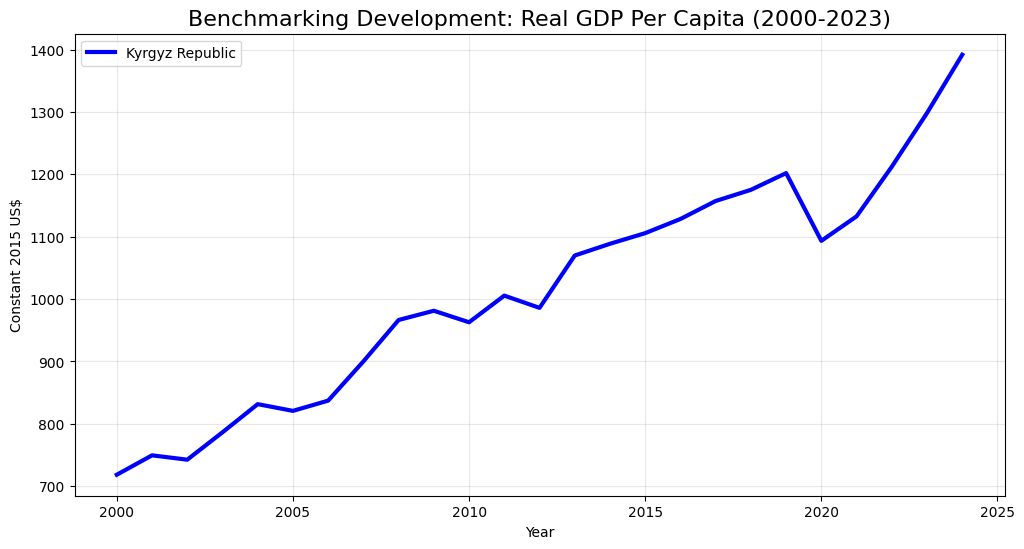

In [31]:
plt.figure(figsize=(12,6))
plt.plot(df.index,df[('KGZ','GDP_Per_Capita_Const')], label='Kyrgyz Republic',color='blue',linewidth=3)
plt.title('Benchmarking Development: Real GDP Per Capita (2000-2023)',fontsize=16)
plt.ylabel('Constant 2015 US$')
plt.xlabel("Year")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

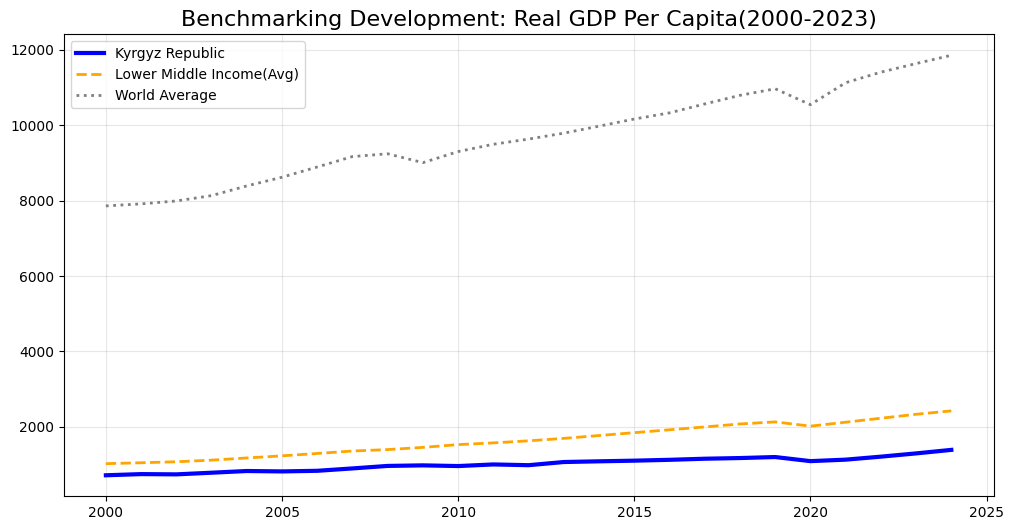

In [35]:
plt.figure(figsize=(12,6))
plt.plot(df.index,df[('KGZ','GDP_Per_Capita_Const')],label='Kyrgyz Republic',color='blue',linewidth=3)
plt.plot(df.index,df[('LMC','GDP_Per_Capita_Const')],label='Lower Middle Income(Avg)',color='orange',linestyle='--',linewidth=2)
plt.plot(df.index,df[('WLD','GDP_Per_Capita_Const')],label='World Average',color='grey',linestyle=':',linewidth=2)

plt.title('Benchmarking Development: Real GDP Per Capita(2000-2023)',fontsize=16)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

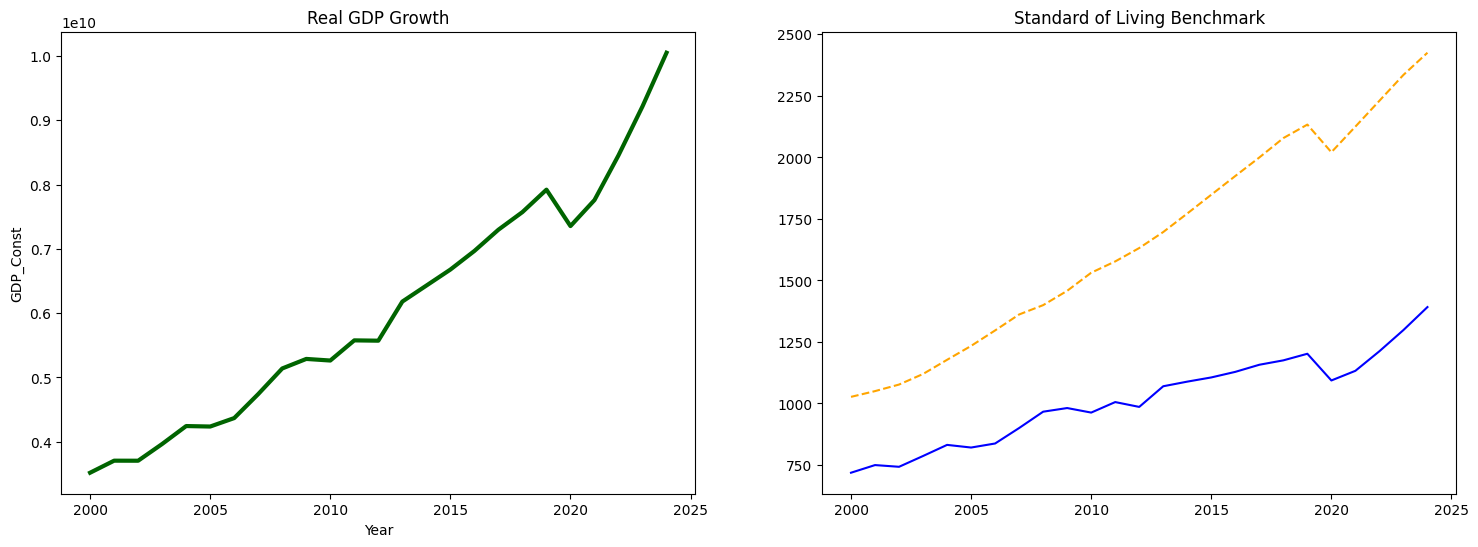

In [39]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(18,6))
sns.lineplot(data=df_kgz,x=df_kgz.index,y='GDP_Const',color='darkgreen',linewidth=3,ax=ax1)
ax1.set_title('Real GDP Growth')
ax2.plot(df.index, df[('KGZ',"GDP_Per_Capita_Const")], color='blue')
ax2.plot(df.index,df[('LMC','GDP_Per_Capita_Const')], color='orange',linestyle="--")
ax2.set_title('Standard of Living Benchmark')
plt.show()

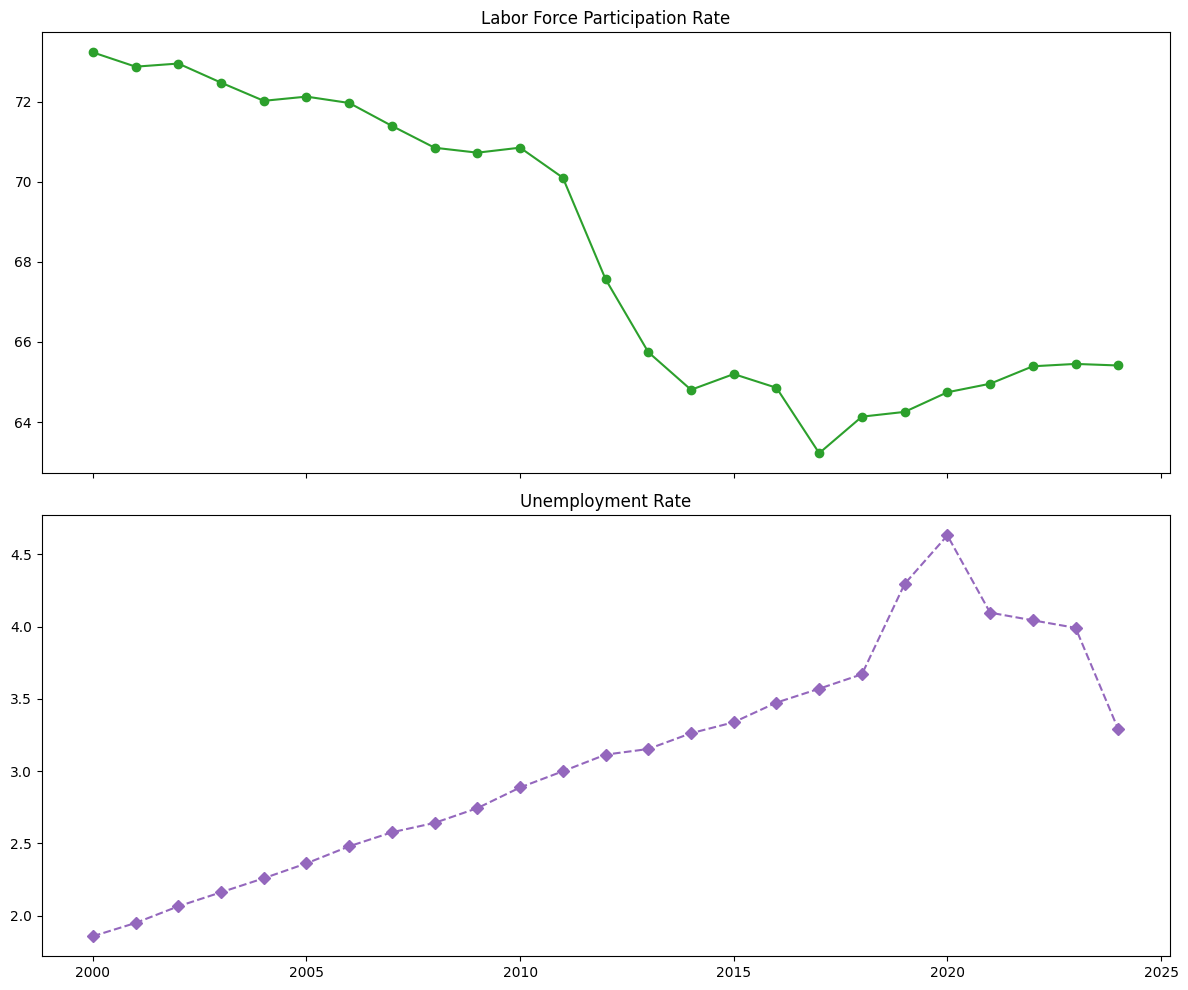

In [42]:
fig, (ax1,ax2)=plt.subplots(2,1,figsize=(12,10),sharex=True)
ax1.plot(df_kgz.index,df_kgz['Labor_Part_Rate'],color='tab:green',marker='o')
ax1.set_title('Labor Force Participation Rate')
ax2.plot(df_kgz.index, df_kgz['Unemployment_Rate'],color='tab:purple',marker='D',linestyle='--')
ax2.set_title('Unemployment Rate')
plt.tight_layout()
plt.show()


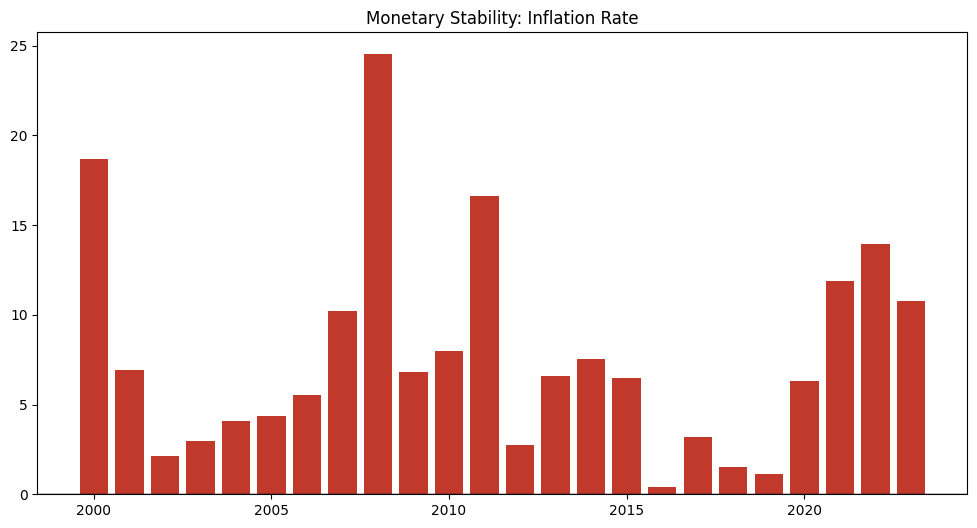

In [43]:
plt.figure(figsize=(12,6))
plt.bar(df_kgz.index,df_kgz['Inflation_CPI'],color='#c0392b')
plt.axhline(0,color='black', linewidth=1)
plt.title('Monetary Stability: Inflation Rate')
plt.show()

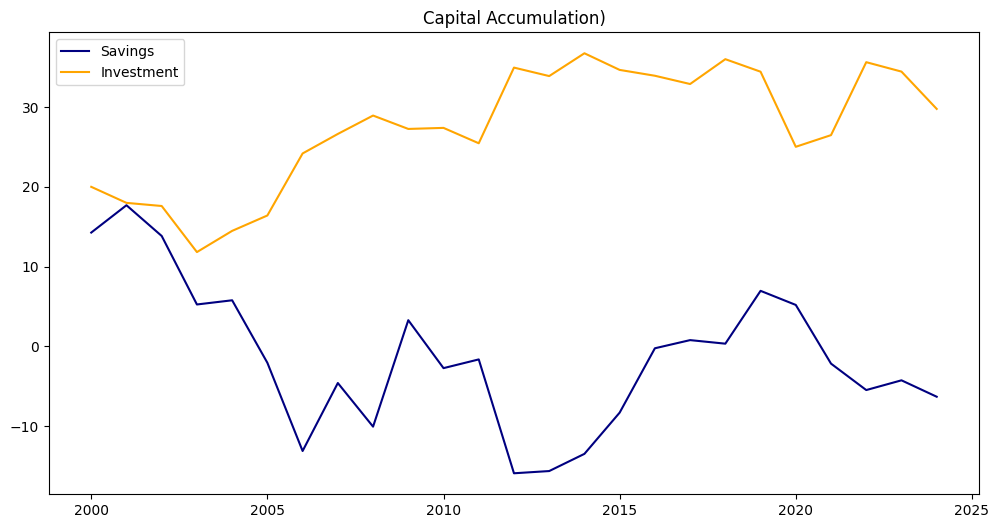

In [44]:
plt.figure(figsize=(12,6))
plt.plot(df_kgz.index, df_kgz['Gross_Dom_Savings'],label='Savings',color='navy')
plt.plot(df_kgz.index, df_kgz['Gross_Cap_Formation'], label='Investment', color='orange')
plt.title("Capital Accumulation)")
plt.legend()
plt.show()

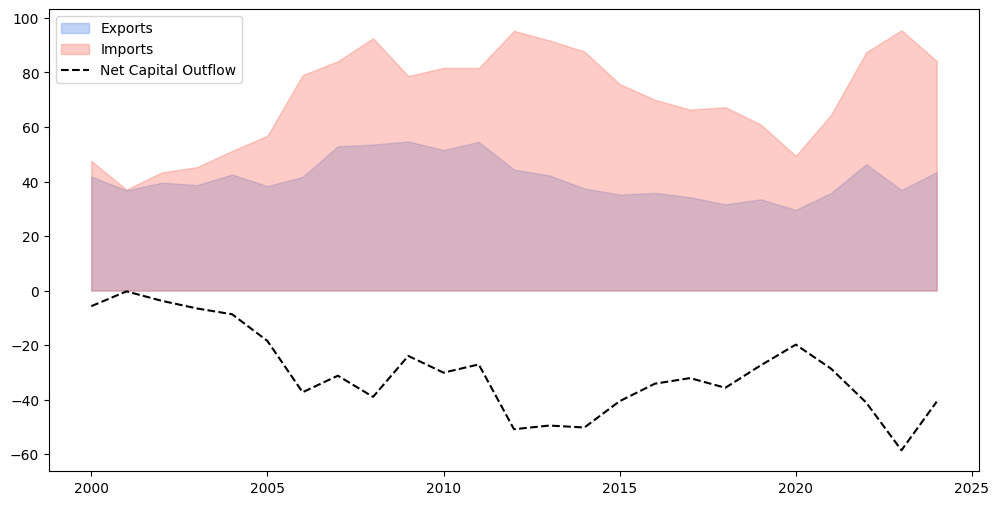

In [46]:
plt.figure(figsize=(12,6))
plt.fill_between(df_kgz.index, df_kgz['Exports_GDP'], color='cornflowerblue', alpha=0.4, label='Exports')
plt.fill_between(df_kgz.index, df_kgz['Imports_GDP'], color='salmon', alpha=0.4, label='Imports')
plt.plot(df_kgz.index, df_kgz['NCO'], color='black', linestyle='--', label='Net Capital Outflow')
plt.legend()
plt.show()

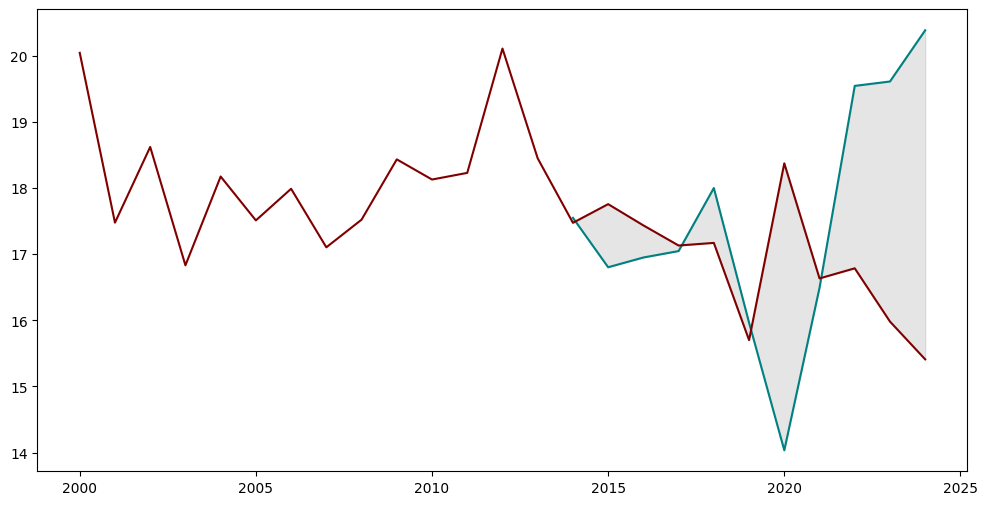

In [47]:
plt.figure(figsize=(12,6))
plt.plot(df_kgz.index, df_kgz['Tax_Rev_GDP'], label='Revenue', color='teal')
plt.plot(df_kgz.index, df_kgz['Gov_Exp_GDP'], label='Expenditure', color='maroon')
plt.fill_between(df_kgz.index, df_kgz['Tax_Rev_GDP'], df_kgz['Gov_Exp_GDP'], color='gray', alpha=0.2)
plt.show()

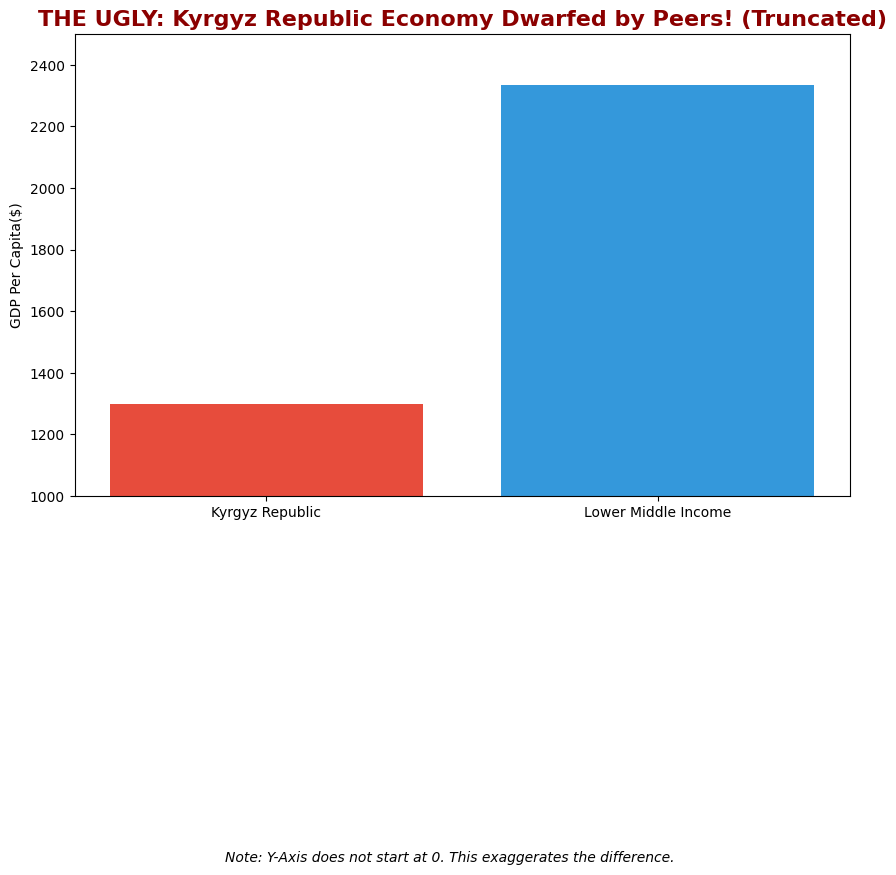

In [63]:
snapshot_year=2023
kgz_val=df.loc[snapshot_year, ('KGZ', 'GDP_Per_Capita_Const')]
lmc_val=df.loc[snapshot_year, ('LMC', 'GDP_Per_Capita_Const')]

values = [kgz_val, lmc_val]
labels = ['Kyrgyz Republic', 'Lower Middle Income']

plt.figure(figsize=(10,6))
bars = plt.bar(labels, values, color=['#e74c3c', '#3498db'])
plt.ylim(1000, 2500)
plt.title("THE UGLY: Kyrgyz Republic Economy Dwarfed by Peers! (Truncated)", fontsize=16, fontweight='bold', color='darkred')
plt.ylabel('GDP Per Capita($)')
plt.figtext(0.5, -0.5, "Note: Y-Axis does not start at 0. This exaggerates the difference.",ha="center", style='italic')

plt.show()

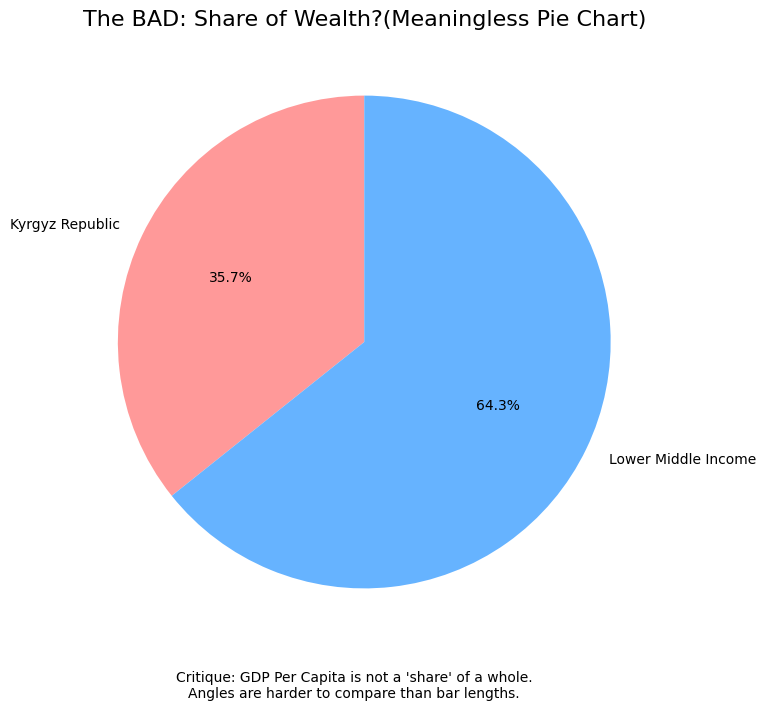

In [65]:
plt.figure(figsize=(8,8))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90)
plt.title('The BAD: Share of Wealth?(Meaningless Pie Chart)', fontsize=16)
plt.figtext(0.5, 0.05, "Critique: GDP Per Capita is not a 'share' of a whole.\nAngles are harder to compare than bar lengths.", ha="center")
plt.show()

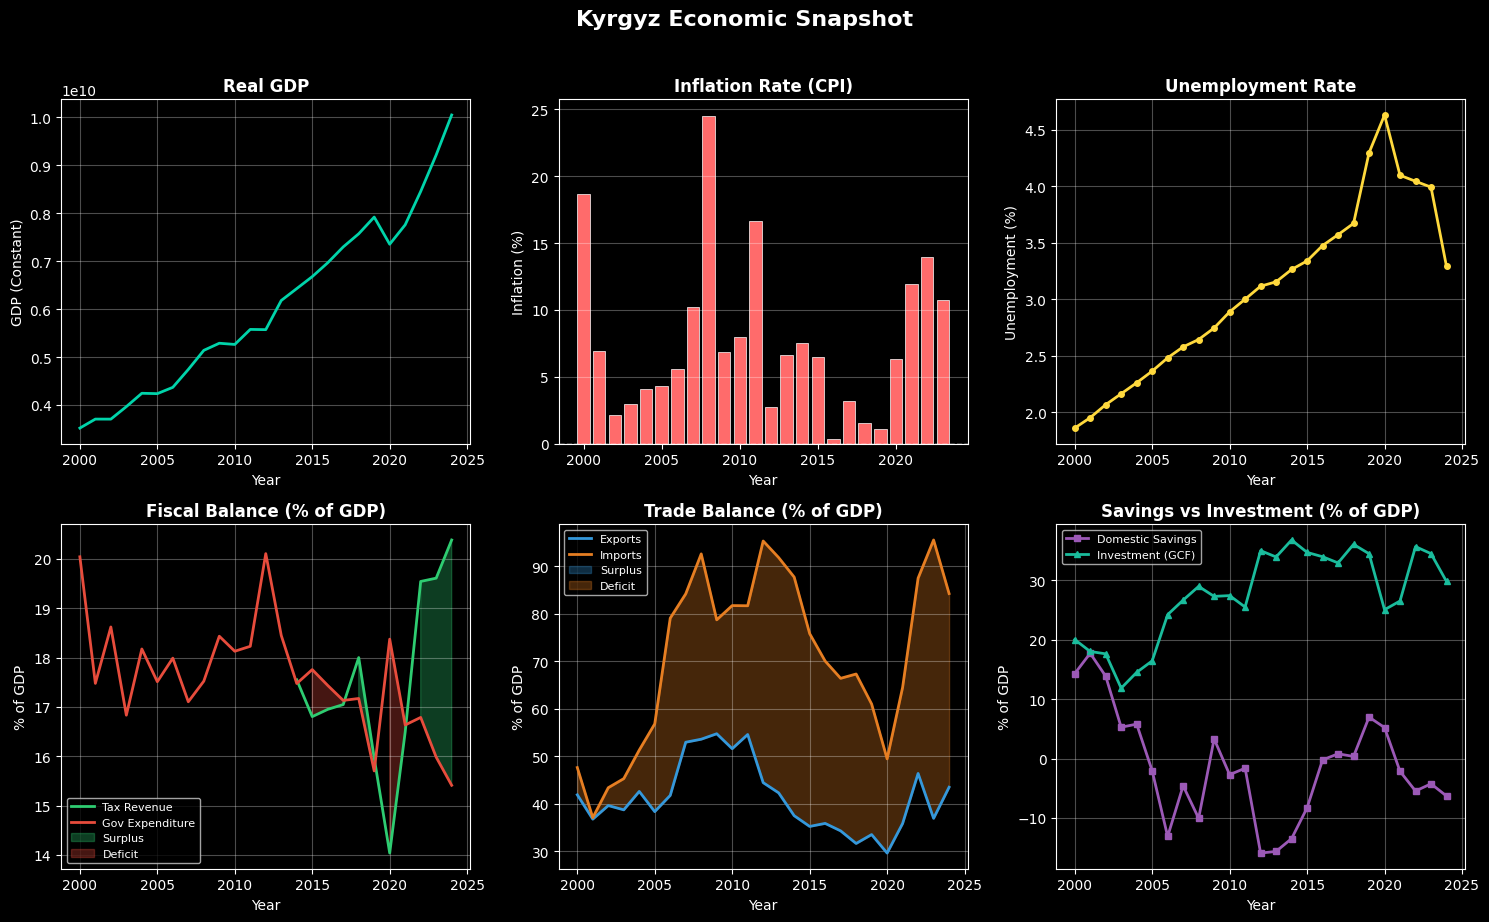

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')
fig, axes = plt.subplots(2, 3, figsize=(15, 9))

# Top Left: Real GDP (Line)
ax1 = axes[0, 0]
ax1.plot(df_kgz.index, df_kgz['GDP_Const'], color='#00d4aa', linewidth=2)
ax1.set_title('Real GDP', fontsize=12, fontweight='bold')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP (Constant)')
ax1.grid(alpha=0.3)

# Top Middle: Inflation (Bar with zero line)
ax2 = axes[0, 1]
colors = ['#ff6b6b' if x > 0 else '#4ecdc4' for x in df_kgz['Inflation_CPI']]
ax2.bar(df_kgz.index, df_kgz['Inflation_CPI'], color=colors, edgecolor='white', linewidth=0.5)
ax2.axhline(y=0, color='white', linestyle='--', linewidth=1)
ax2.set_title('Inflation Rate (CPI)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Year')
ax2.set_ylabel('Inflation (%)')
ax2.grid(alpha=0.3, axis='y')

# Top Right: Unemployment (Line)
ax3 = axes[0, 2]
ax3.plot(df_kgz.index, df_kgz['Unemployment_Rate'], color='#ffd93d', linewidth=2, marker='o', markersize=4)
ax3.set_title('Unemployment Rate', fontsize=12, fontweight='bold')
ax3.set_xlabel('Year')
ax3.set_ylabel('Unemployment (%)')
ax3.grid(alpha=0.3)

# Bottom Left: Fiscal Balance (Fill between Tax Rev & Gov Exp)
ax4 = axes[1, 0]
ax4.plot(df_kgz.index, df_kgz['Tax_Rev_GDP'], label='Tax Revenue', color='#2ecc71', linewidth=2)
ax4.plot(df_kgz.index, df_kgz['Gov_Exp_GDP'], label='Gov Expenditure', color='#e74c3c', linewidth=2)
ax4.fill_between(df_kgz.index, df_kgz['Tax_Rev_GDP'], df_kgz['Gov_Exp_GDP'],
                  where=(df_kgz['Tax_Rev_GDP'] >= df_kgz['Gov_Exp_GDP']), color='#2ecc71', alpha=0.3, label='Surplus')
ax4.fill_between(df_kgz.index, df_kgz['Tax_Rev_GDP'], df_kgz['Gov_Exp_GDP'],
                  where=(df_kgz['Tax_Rev_GDP'] < df_kgz['Gov_Exp_GDP']), color='#e74c3c', alpha=0.3, label='Deficit')
ax4.set_title('Fiscal Balance (% of GDP)', fontsize=12, fontweight='bold')
ax4.set_xlabel('Year')
ax4.set_ylabel('% of GDP')
ax4.legend(loc='best', fontsize=8)
ax4.grid(alpha=0.3)

# Bottom Middle: Trade Balance (Fill between Exports & Imports)
ax5 = axes[1, 1]
ax5.plot(df_kgz.index, df_kgz['Exports_GDP'], label='Exports', color='#3498db', linewidth=2)
ax5.plot(df_kgz.index, df_kgz['Imports_GDP'], label='Imports', color='#e67e22', linewidth=2)
ax5.fill_between(df_kgz.index, df_kgz['Exports_GDP'], df_kgz['Imports_GDP'],
                  where=(df_kgz['Exports_GDP'] >= df_kgz['Imports_GDP']), color='#3498db', alpha=0.3, label='Surplus')
ax5.fill_between(df_kgz.index, df_kgz['Exports_GDP'], df_kgz['Imports_GDP'],
                  where=(df_kgz['Exports_GDP'] < df_kgz['Imports_GDP']), color='#e67e22', alpha=0.3, label='Deficit')
ax5.set_title('Trade Balance (% of GDP)', fontsize=12, fontweight='bold')
ax5.set_xlabel('Year')
ax5.set_ylabel('% of GDP')
ax5.legend(loc='best', fontsize=8)
ax5.grid(alpha=0.3)

# Bottom Right: Savings vs Investment (Dual lines)
ax6 = axes[1, 2]
ax6.plot(df_kgz.index, df_kgz['Gross_Dom_Savings'], label='Domestic Savings', color='#9b59b6', linewidth=2, marker='s', markersize=4)
ax6.plot(df_kgz.index, df_kgz['Gross_Cap_Formation'], label='Investment (GCF)', color='#1abc9c', linewidth=2, marker='^', markersize=4)
ax6.set_title('Savings vs Investment (% of GDP)', fontsize=12, fontweight='bold')
ax6.set_xlabel('Year')
ax6.set_ylabel('% of GDP')
ax6.legend(loc='best', fontsize=8)
ax6.grid(alpha=0.3)

fig.suptitle('Kyrgyz Economic Snapshot', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()